In [2]:
import os
import numpy as np
import pandas as pd 
import scipy
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import glob
import matplotlib
import scipy
from config import *
matplotlib.rcParams["svg.fonttype"] = "none"
matplotlib.rcParams["text.usetex"] = False

In [14]:
# sanity check
universes = [
        "tile1k",
        "tile5k",
        "tile25k",
        "dhs",
        "Large",
        "Medium",
        "Small",
    ]
gdss_path = os.path.join(EVAL_RESULTS_FOLDER, "gdss_results")
for universe in universes:
    upath = os.path.join(gdss_path, universe)
    if os.path.exists(upath):
        files = glob.glob(os.path.join(upath,"gdss_eval*"))
        if len(files) != 20:
            print(f"[GDSS] Incomplete {universe}")
    else:
        print(f"[GDSS] Incomplete {universe}")
        
nps_path = os.path.join(EVAL_RESULTS_FOLDER, "nps_results")
for universe in universes:
    upath = os.path.join(nps_path, universe)
    if os.path.exists(upath):
        files = glob.glob(os.path.join(upath,"nps_eval*"))
        if len(files) != 20:
            print(f"[NPS] Incomplete {universe}")
    else:
        print(f"[NPS] Incomplete {universe}")
        

cts_path = os.path.join(EVAL_RESULTS_FOLDER, "cts_results")
for universe in universes:
    upath = os.path.join(cts_path, universe)
    if os.path.exists(upath):
        files = glob.glob(os.path.join(upath,"cts_eval*"))
        if len(files) != 20:
            print(f"[cts] Incomplete {universe}")
    else:
        print(f"[CTS] Incomplete {universe}")

rcs_path = os.path.join(EVAL_RESULTS_FOLDER, "rcs_results")
for universe in universes:
    upath = os.path.join(rcs_path, universe)
    if os.path.exists(upath):
        files = glob.glob(os.path.join(upath,"rcs_eval*"))
        if len(files) != 5:
            print(f"[RCS] Incomplete {universe}")
    else:
        print(f"[RCS] Incomplete {universe}")

In [15]:
def extract_name(path):
    if 'pickle' in path:
        name = path.split('.')[0].strip()
        if 'bin' in name:
            name = 'Binary'
        elif 'pca' in name:
            name = "PCA-{}".format(name.split("_")[-1].strip())
    else:
        name = path.split('/')[-3]
    return name

In [ ]:
def get_cts_results(universe):
    paths = glob.glob(f"{EVAL_RESULTS_FOLDER}/cts_results/{universe}/cts_eval_seed*")
    cts_scores = {}
    for path in paths:
        with open(path, "rb") as f:
            results = pickle.load(f)
        for result in results:
            name = extract_name(result[0])
            score = max(result[1]-0.5,0)*2 # rescale the score
            if name in cts_scores:
                cts_scores[name].append(score)
            else:
                cts_scores[name] = [score]
    names = list(cts_scores.keys())
    cts_scores = np.array([cts_scores[n] for n in names])
    if len(cts_scores.shape) == 1:
        cts_scores = cts_scores.reshape(len(cts_scores),1)
    cts_avg = cts_scores.mean(axis=1)
    cts_std = cts_scores.std(axis=1)
    indexes = np.argsort(cts_avg)
    cts_avg = cts_avg[indexes]
    cts_std = cts_std[indexes]
    names = [names[i] for i in indexes]
    return cts_avg, cts_std, names

def get_cts_plot(universe, save_fig=False):
    paths = glob.glob(f"{EVAL_RESULTS_FOLDER}/cts_results/{universe}/cts_eval_seed*")
    cts_scores = {}
    for path in paths:
        with open(path, "rb") as f:
            results = pickle.load(f)
        for result in results:
            name = extract_name(result[0])
            score = max(result[1]-0.5,0)*2 # rescale the score
            if name in cts_scores:
                cts_scores[name].append(score)
            else:
                cts_scores[name] = [score]
    names = list(cts_scores.keys())
    cts_scores = np.array([cts_scores[n] for n in names])
    if len(cts_scores.shape) == 1:
        cts_scores = cts_scores.reshape(len(cts_scores),1)
    cts_avg = cts_scores.mean(axis=1)
    cts_std = cts_scores.std(axis=1)
    indexes = np.argsort(cts_avg)
    cts_avg = cts_avg[indexes]
    cts_std = cts_std[indexes]
    names = [names[i] for i in indexes]
    cmap = plt.get_cmap("Blues")
    colors = cmap(np.linspace(0, 1, 5))
    fig, ax = plt.subplots(figsize=(5,5))
    y_pos = np.arange(len(names))
    ax.barh(y_pos, cts_avg, xerr=cts_std, align='center',color=colors[2])
    ax.set_yticks(y_pos, labels=names)
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(16)
    ax.set_xlabel('CTS', fontsize=16)
    
    
    if save_fig:
        os.makedirs(f"{EVAL_RESULTS_FOLDER}/scores_visualization/cts_results",exist_ok=True)
        fig.savefig(f"{EVAL_RESULTS_FOLDER}/scores_visualization/cts_results/cts_{universe}.svg", bbox_inches="tight")
    plt.show()
for u in universes:
    get_cts_plot(u, True)

In [26]:
def get_rcs_results(universe, paths=None):
    if paths is None:
        paths = glob.glob(f"{EVAL_RESULTS_FOLDER}/rcs_results/{universe}/rcs_eval_seed*")
    
    rcs_dict = {}
    for path in paths:
        with open(path, "rb") as f:
            results = pickle.load(f)
        for result in results:
            name = extract_name(result[0])
            if name in rcs_dict:
                rcs_dict[name].append(result[1])
            else:
                rcs_dict[name] = [result[1]]
    names = []
    rcs_scores = []
    rcs_stds = []
    for k in rcs_dict:
        names.append(k)
        scores = np.array(rcs_dict[k]).mean()
        avg_score = scores.mean()
        rcs_scores.append(avg_score)
        std_score = scores.std()
        rcs_stds.append(std_score)
    rcs_stds = np.array(rcs_stds)
    rcs_scores = np.array(rcs_scores)
    indexes = np.argsort(rcs_scores)
    rcs_scores = rcs_scores[indexes]
    rcs_stds = rcs_stds[indexes]
    names = [names[i] for i in indexes]
    return rcs_scores, rcs_stds, names

def get_rcs_plot(universe, save_fig=False):
    paths = glob.glob(f"{EVAL_RESULTS_FOLDER}/rcs_results/{universe}/rcs_eval_seed*")
    rcs_scores = {}
    for path in paths:
        with open(path, "rb") as f:
            results = pickle.load(f)
        for result in results:
            name = extract_name(result[0])
            score = result[1]
            if name in rcs_scores:
                rcs_scores[name].append(score)
            else:
                rcs_scores[name] = [score]
    names = list(rcs_scores.keys())
    rcs_scores = np.array([rcs_scores[n] for n in names])
    if len(rcs_scores.shape) == 1:
        rcs_scores = rcs_scores.reshape(len(rcs_scores),1)
    rcs_avg = rcs_scores.mean(axis=1)
    rcs_std = rcs_scores.std(axis=1)
    indexes = np.argsort(rcs_avg)
    rcs_avg = rcs_avg[indexes]
    rcs_std = rcs_std[indexes]
    names = [names[i] for i in indexes]
    cmap = plt.get_cmap("Blues")
    colors = cmap(np.linspace(0, 1, 5))
    fig, ax = plt.subplots(figsize=(5,5))
    y_pos = np.arange(len(names))
    ax.barh(y_pos, rcs_avg, xerr=rcs_std, align='center',color=colors[2])
    ax.set_yticks(y_pos, labels=names)
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(16)
    ax.set_xlabel('RCS', fontsize=16)
    
    if save_fig:
        os.makedirs(f"{EVAL_RESULTS_FOLDER}/scores_visualization/rcs_results",exist_ok=True)
        fig.savefig(f"{EVAL_RESULTS_FOLDER}/scores_visualization/rcs_results/rcs_{universe}.svg", bbox_inches="tight")
    plt.close()
    # plt.show()
for u in universes:
    get_rcs_plot(u, True)

In [ ]:
def get_gdss_results(result_path):
    universe = result_path.split('/')[-2]
    gds_seeds = glob.glob(result_path)
    gds_arr = [[] for i in range(15)]
    names = ['' for i in range(15)]
    for gds_seed in gds_seeds:
        with open(gds_seed,'rb') as f:
            results = pickle.load(f)
            for i,res in enumerate(results):
                name = extract_name(res[0])
                gds_arr[i].append(res[1])
                names[i] = name
    name_dict = {n:i for i,n in enumerate(names)}
    gds_arr = np.array(gds_arr)
    gds_std = gds_arr.std(axis=1)
    gds_median = np.median(gds_arr,axis=1)
    
    
    indexes = np.argsort(-gds_median)
    gds_median = -np.sort(-gds_median)
    names = [names[i] for i in indexes]
    return gds_median, names

def produce_gdss_plots(result_path, save_folder, save_fig=False):
    os.makedirs(save_folder,exist_ok=True)
    universe = result_path.split('/')[-2]
    gds_seeds = glob.glob(result_path)
    gds_arr = [[] for i in range(15)]
    names = ['' for i in range(15)]
    for gds_seed in gds_seeds:
        with open(gds_seed,'rb') as f:
            results = pickle.load(f)
            for i,res in enumerate(results):
                name = extract_name(res[0])
                gds_arr[i].append(res[1])
                names[i] = name
    name_dict = {n:i for i,n in enumerate(names)}
    gds_arr = np.array(gds_arr)
    gds_std = gds_arr.std(axis=1)
    gds_median = np.median(gds_arr,axis=1)
    
    
    indexes = np.argsort(-gds_median)
    
    y_pos = np.arange(len(gds_median))
    sorted_gds_arr = [gds_arr[i] for i in indexes]
    fig, ax = plt.subplots(figsize=(5,5))
    _ = ax.violinplot(sorted_gds_arr,y_pos,vert=False,showmedians=True,showextrema=False,widths=0.8)
    ax.invert_yaxis()
    _ = ax.set_yticks(y_pos, labels=[names[i] for i in indexes])
    ax.grid(axis="y")
    ax.set_xlabel("GDSS ($10^{-10}$)",fontsize=16)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(16)
    if save_fig:
        file_name = os.path.join(save_folder, "gdss_{}.svg".format(universe))
        fig.savefig(file_name, bbox_inches="tight")
    plt.show()

gdss_result_batch = [f"{EVAL_RESULTS_FOLDER}/gdss_results/{u}/gdss_eval_seed*" for u in universes]
for path in gdss_result_batch:
    produce_gdss_plots(path, f"{EVAL_RESULTS_FOLDER}/scores_visualization/gdss_results/", True)

In [25]:
def get_nps_results(result_path, Kidx=0):
    universe = result_path.split('/')[-2]
    nps_seeds = glob.glob(result_path)
    
    snpr_arr = [[] for i in range(15)]
    names = ['' for i in range(15)]
    for nps_seed in nps_seeds:
        with open(nps_seed,'rb') as f:
            result = pickle.load(f)
        for i, res in enumerate(result):
            snpr_arr[i].append(res['SNPR'])
            name = extract_name(res['Path'])
            names[i] = name
    snpr_arr_k = [np.array(s)[:,Kidx] for s in snpr_arr]  
    snprs_median = np.array([np.median(s) for s in snpr_arr_k])
    indexes = np.argsort(-snprs_median)
    snprs_median = [snprs_median[i] for i in indexes]
    names = [names[i] for i in indexes]
    return snprs_median, names

def produce_nps_plots(result_path, save_folder, Kidx=0):
    os.makedirs(save_folder,exist_ok=True)
    universe = result_path.split('/')[-2]
    nps_seeds = glob.glob(result_path)
    
    snpr_arr = [[] for i in range(15)]
    names = ['' for i in range(15)]
    for nps_seed in nps_seeds:
        with open(nps_seed,'rb') as f:
            result = pickle.load(f)
        for i, res in enumerate(result):
            snpr_arr[i].append(res['SNPR'])
            name = extract_name(res['Path'])
            names[i] = name
    
    snpr_arr_k = [np.stack(s)[:,Kidx] for s in snpr_arr]  
    snprs_avg = np.array([s.mean() for s in snpr_arr_k]) # select the first element
    snprs_median = np.array([np.median(s) for s in snpr_arr_k])
    name_dict = {n:i for i,n in enumerate(names)}
    
    indexes = np.argsort(-snprs_median)
    sorted_snpr_arr = [snpr_arr_k[i] for i in indexes]
    y_pos = np.arange(len(sorted_snpr_arr))
    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_yticks(y_pos, labels=[names[i] for i in indexes])
    # ax.barh(y_pos, sort_snprs,align='center')
    
    _ = ax.violinplot(sorted_snpr_arr,y_pos,vert=False,showmedians=True,showextrema=False,widths=0.8)
    ax.invert_yaxis()
    _ = ax.set_yticks(y_pos, labels=[names[i] for i in indexes])
    ax.grid(axis="y")
    ax.set_xlabel("NPS", fontsize=16)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # ax.get_xaxis().set_ticks([])
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(16)
    file_name = os.path.join(save_folder, "nps_{}.svg".format(universe))
    
    fig.savefig(file_name, bbox_inches="tight")
    fig.clf()
    plt.close()
    
nps_result_batch = [f"{EVAL_RESULTS_FOLDER}/nps_results/{u}/nps_eval_seed*" for u in universes]
for path in nps_result_batch:
    produce_nps_plots(path, f"{EVAL_RESULTS_FOLDER}/scores_visualization/nps_results/", 9)

In [31]:
data_svm = pd.read_csv("classificaton_results_svm.txt")    
data_svm = pd.concat([data_svm[data_svm['universe'] == u] for u in universes], ignore_index=True)
def remap_name(name):
    if "bin_embed" in name:
        return "Binary"
    elif "pca_embed_10D" in name:
        return "PCA-10D"
    elif "pca_embed_100D" in name:
        return "PCA-100D"
    else:
        return name
data_svm["model"] = data_svm["model"].apply(remap_name)

In [ ]:
data_svm

In [33]:
eval_gdss_pd = []
for u in universes:
    gdss_scores, names = get_gdss_results(f"{EVAL_RESULTS_FOLDER}/gdss_results/{u}/gdss_eval_seed*")
    eval_gdss_pd.append(pd.DataFrame({'universe':[u]*len(names), 'GDSS':gdss_scores, 'model':names}))
eval_gdss_pd = pd.concat(eval_gdss_pd)  

eval_nps_pd = []
for u in universes:
    nps_scores, names = get_nps_results(f"{EVAL_RESULTS_FOLDER}/nps_results/{u}/nps_eval_seed*", 9)
    eval_nps_pd.append(pd.DataFrame({'universe':[u]*len(names), 'NPS':nps_scores, 'model':names})) 
eval_nps_pd = pd.concat(eval_nps_pd)

eval_scores_pd = pd.merge(eval_gdss_pd, eval_nps_pd, how='left', on=['universe', 'model'])

eval_cts_pd = []
for u in universes:
    cts_scores, cts_stds, names = get_cts_results(u)
    cts_scores = np.maximum(cts_scores-0.5,0) * 2
    eval_cts_pd.append(pd.DataFrame({'universe':[u]*len(names), 'CTS':cts_scores, 'model':names})) 
eval_cts_pd = pd.concat(eval_cts_pd)

eval_scores_pd = eval_scores_pd.merge(eval_cts_pd, how='left', on=['universe', 'model'])

eval_rcs_pd = []
for u in universes:
    rcs_scores, rcs_stds, names = get_rcs_results(u)
    eval_rcs_pd.append(pd.DataFrame({'universe':[u]*len(names), 'RCS':rcs_scores, 'model':names})) 
eval_rcs_pd = pd.concat(eval_rcs_pd)

eval_scores_pd = eval_scores_pd.merge(eval_rcs_pd, how='left', on=['universe', 'model'])

In [34]:
all_scores_svm = data_svm.merge(eval_scores_pd, how='left', on=['universe', 'model'])

In [50]:
def plot_pairgird(dataframe):
    g = sns.PairGrid(dataframe)
    def print_stats(x,**kws):
        ax = plt.gca()
        ax.text(
            .5, .5, x.name, size=14,
            ha="center", va="center", transform=ax.transAxes
        )
    def regplot(x, y, **kw):
        ax = plt.gca()
        # colors = []
        # for i, n in enumerate(x.index):
        #     ax.annotate(n, (x[i],y[i]))
        sns.regplot(x=x, y=y, ax=ax)
        
    g.map_diag(print_stats)
    g.map_offdiag(regplot)
    return g

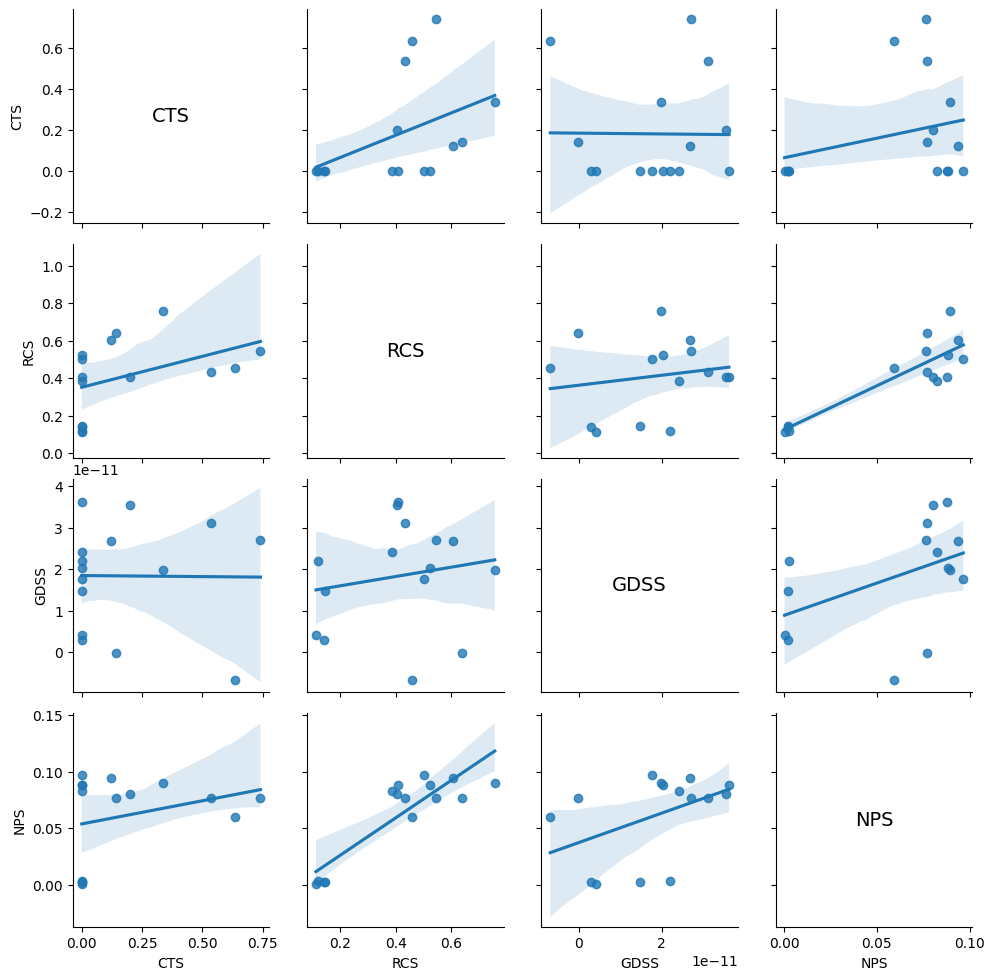

In [53]:
dataframe = all_scores_centroids[all_scores_centroids['universe'] == 'Large']
dataframe = dataframe[['CTS','RCS','GDSS','NPS']]
dataframe['GDSS'] = dataframe['GDSS'] * 1e-10
fig = plot_pairgird(dataframe)
fig.savefig(f"{EVAL_RESULTS_FOLDER}/scores_visualization/corr_large.svg")

In [20]:
for class_type in ["cell", "antibody"]:
    for test_type in ["CTS", "RCS", "GDSS", "NPS"]:
        corrs = []
        for u in universes:
            condition = (all_scores_svm['universe']==u)
            accs = all_scores_svm[condition][f'{class_type}_acc'].to_numpy()
            gdsss = all_scores_svm[condition][test_type].to_numpy()
            corr, _ = scipy.stats.pearsonr(accs, gdsss)
            corrs.append((u,corr))

        corr_vals = np.array([c[1] for c in corrs])
        print(class_type, test_type, corr_vals.mean(), corr_vals.std())
        # print(corrs)

cell CTT 0.2177152632492275 0.04333430061872965
cell RCT 0.7815754985218587 0.03762097949943948
cell GDST 0.481449691772419 0.15750271026855375
cell NPT 0.8849686422002375 0.01146073696789036
antibody CTT 0.1386218351187427 0.09260464656522456
antibody RCT 0.762196187246839 0.05453073693544511
antibody GDST 0.5184694519799277 0.1079406274713759
antibody NPT 0.8765008568159824 0.025631889123376966
